##Data Preprocessing 

영상 데이터 전처리
#missingno 라이브러리: 결측치 시각화

In [1]:
#정형데이터 전처리
import seaborn as sns
import pandas as pd
# !pip install missingno
import missingno as msn

In [2]:

 
df=sns.pd.DataFrame(tit)
df

AttributeError: module 'seaborn' has no attribute 'pd'

환경구성

#설치 라이브러리 
'''python
!pip install opencv-python

In [3]:
import os
import matplotlib.pyplot as plt
#설치되어있을경우 주석처리 혹은 삭제
# !pip install opencv-python
 
import cv2
import pandas as pd
import seaborn as sns

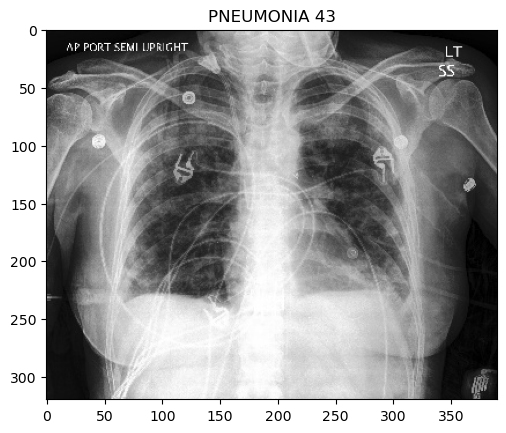

In [4]:

#data 경로설정 
data_dir='./Positive/'
#전처리된 데이터셋을 훈련용, 평가용,검증용으로 구분
categories=['train','test','val'] 

#샘플이미지 시각화

# folder_path=os.path.join(data_dir,category,'PNEUMONIA')
img_name=os.listdir(data_dir)[42]
img_path = os.path.join(data_dir,img_name)
img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

plt.imshow(img,cmap='grey')
plt.title(f'PNEUMONIA 43')
plt.show()


In [ ]:
import os
os.getcwd()

'c:\\WORKSPACE\\medical1\\0604'

Image Resize

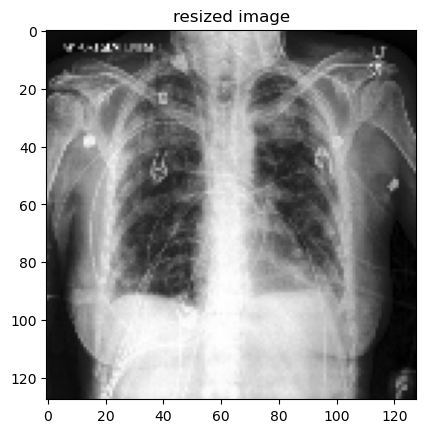

In [6]:
def resize_image(img, size=(128,128)):
    return cv2.resize(img, size)
resized_image = resize_image(img)
plt.imshow(resized_image, cmap='gray')
plt.title('resized image') # 주의점!! 1:1 이미지가 아니므로 왜곡이 생겨 보기힘들다..패딩으로 보정해줘야함
plt.show()

histogram Equalization 
#image level 평활화

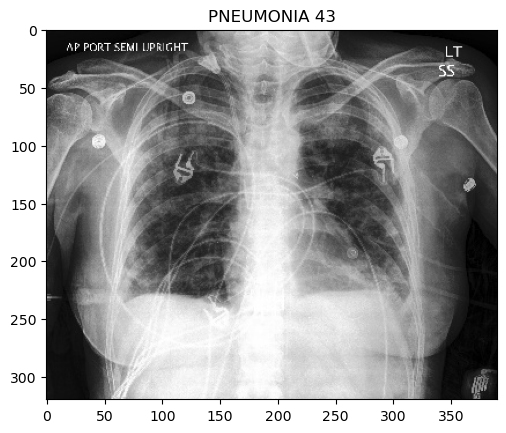

In [6]:
def he_img(img):
    return cv2.equalizeHist(img)

equalized_img =he_img(img)
plt.imshow(img,cmap='grey')
plt.title(f'PNEUMONIA 43')
plt.show()

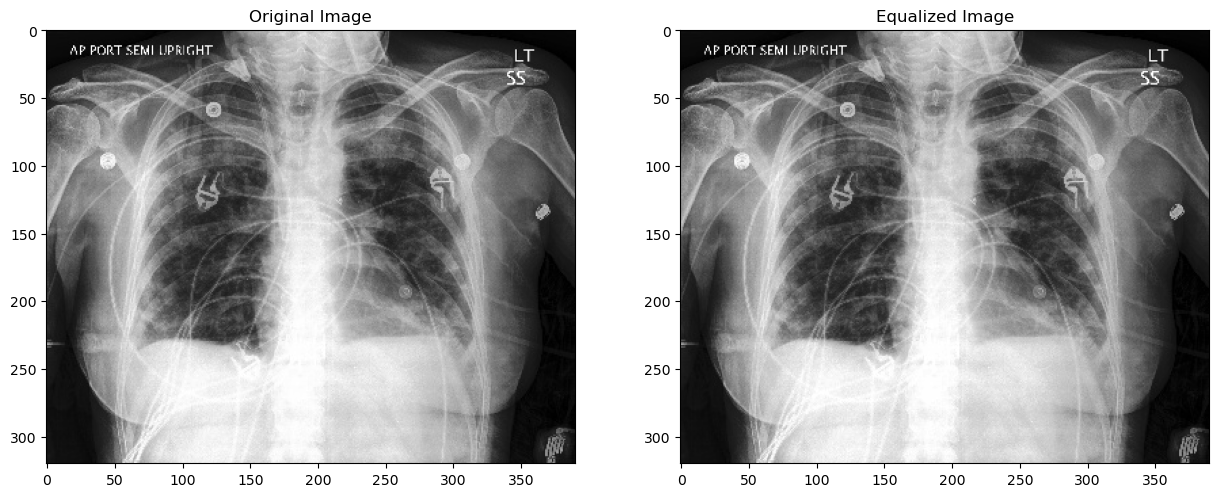

In [7]:
equalized_img = he_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

TypeError: Image data of dtype object cannot be converted to float

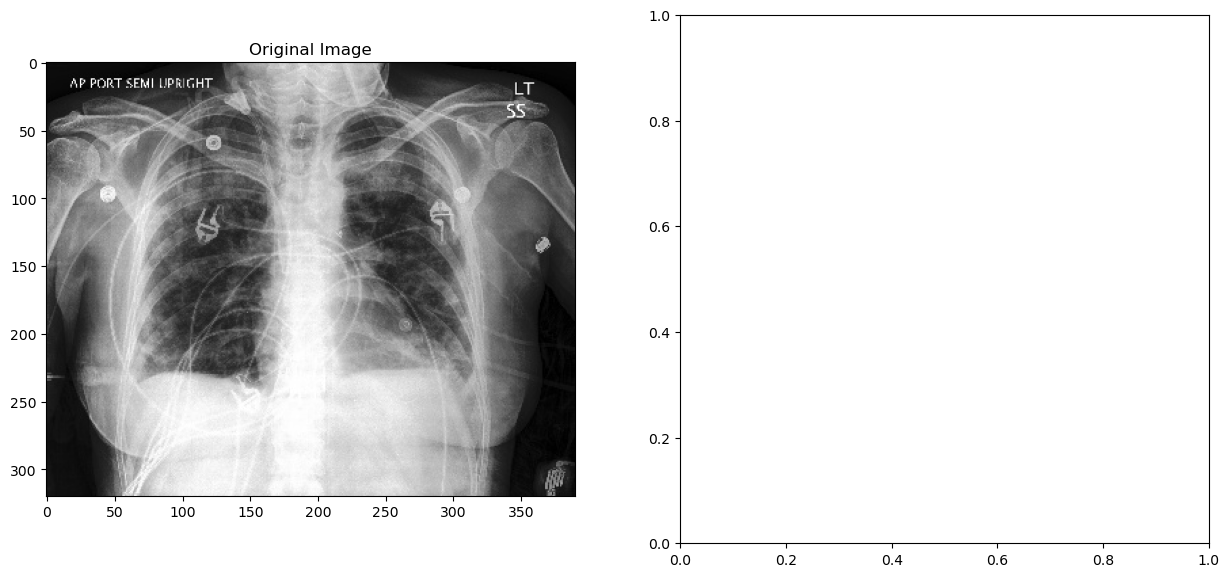

In [12]:
#Histogram Equlization CLAHE(Contrast Limited Adaptive Histogram)
def clahe_image(img):
    clahe=cv2.createCLAHE(clipLimit=2., tileGridSize=(8,8))
    cl_img = clahe.apply(img)
    return cl_img

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image')
plt.show()

Data Augmentation
    -데이터의 수를 증가시켜 학습,평가용 데이터를 추가확보
    -데이터의 표본(n)수가 적을때 주로 사용

In [13]:
!pip install keras

'DOSKEY'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [14]:
from keras.preprocessing.image import ImageDataGenerator

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (c:\Users\KOREAVC\anaconda3\Lib\site-packages\keras\api\preprocessing\image\__init__.py)

#Noise Reduction 

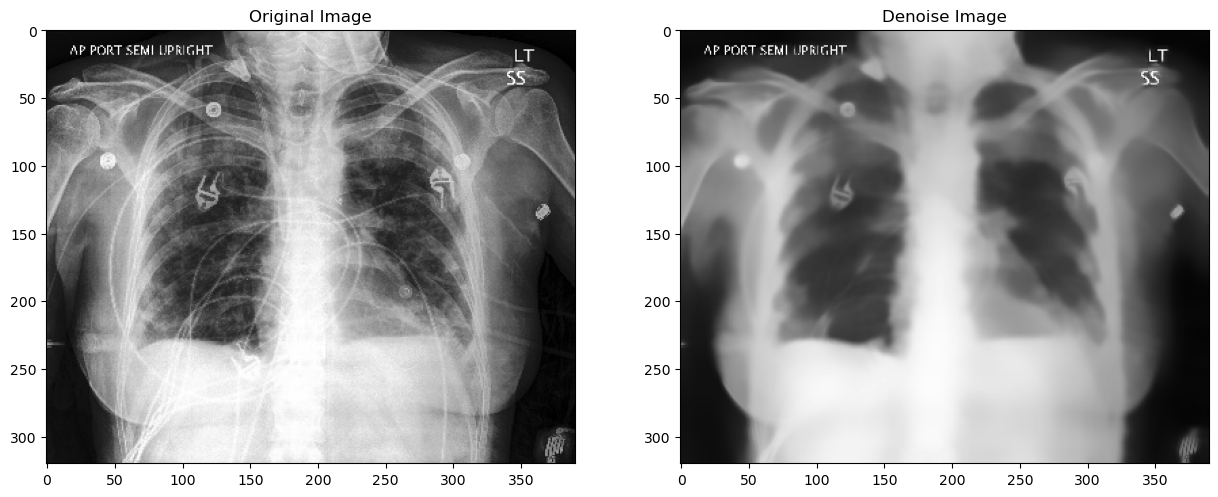

In [19]:
def denoise_img(img):
    return cv2.fastNlMeansDenoising(img,None,30,7,21)

denoised_img=denoise_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoise Image')
plt.show()

In [16]:
?cv2.fastNlMeansDenoising

Docstring:
fastNlMeansDenoising(src[, dst[, h[, templateWindowSize[, searchWindowSize]]]]) -> dst
.   @brief Perform image denoising using Non-local Means Denoising algorithm
.   <http://www.ipol.im/pub/algo/bcm_non_local_means_denoising/> with several computational
.   optimizations. Noise expected to be a gaussian white noise
.   
.   @param src Input 8-bit 1-channel, 2-channel, 3-channel or 4-channel image.
.   @param dst Output image with the same size and type as src .
.   @param templateWindowSize Size in pixels of the template patch that is used to compute weights.
.   Should be odd. Recommended value 7 pixels
.   @param searchWindowSize Size in pixels of the window that is used to compute weighted average for
.   given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater
.   denoising time. Recommended value 21 pixels
.   @param h Parameter regulating filter strength. Big h value perfectly removes noise but also
.   removes image details, small

#Image Normalization
    -데이터 정규화 처리
    -연산 효율 높이고 정규성을 생성 
    -MINMAX 많이 사용
    -자릿값이 다름.

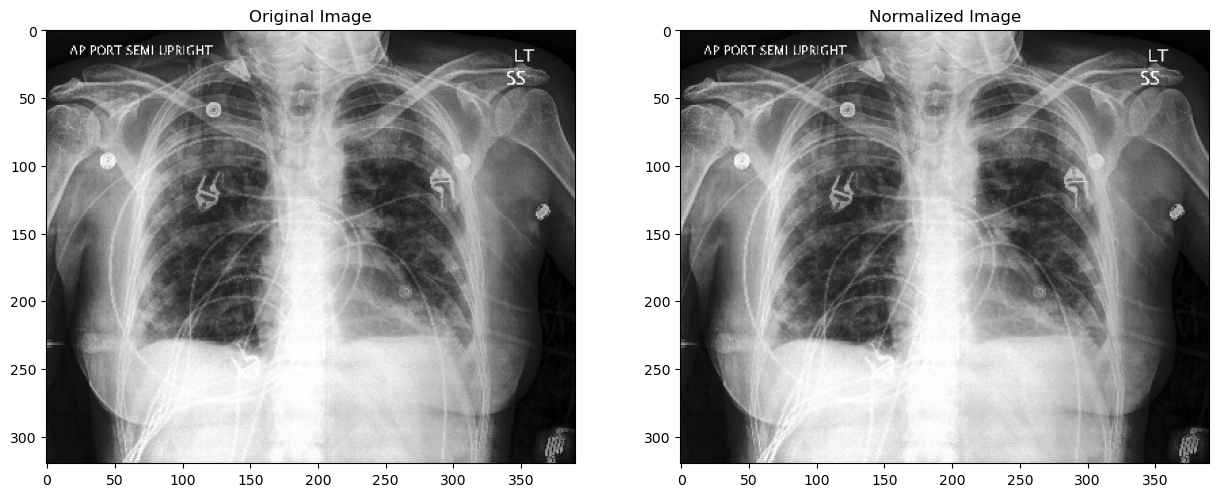

In [22]:
def normalize_img(img):
    return cv2.normalize(img,None,0,225, cv2.NORM_MINMAX)
normalized_img=normalize_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized Image')
plt.show()

#Edge Detection 
    -경계선을 뽑아냄

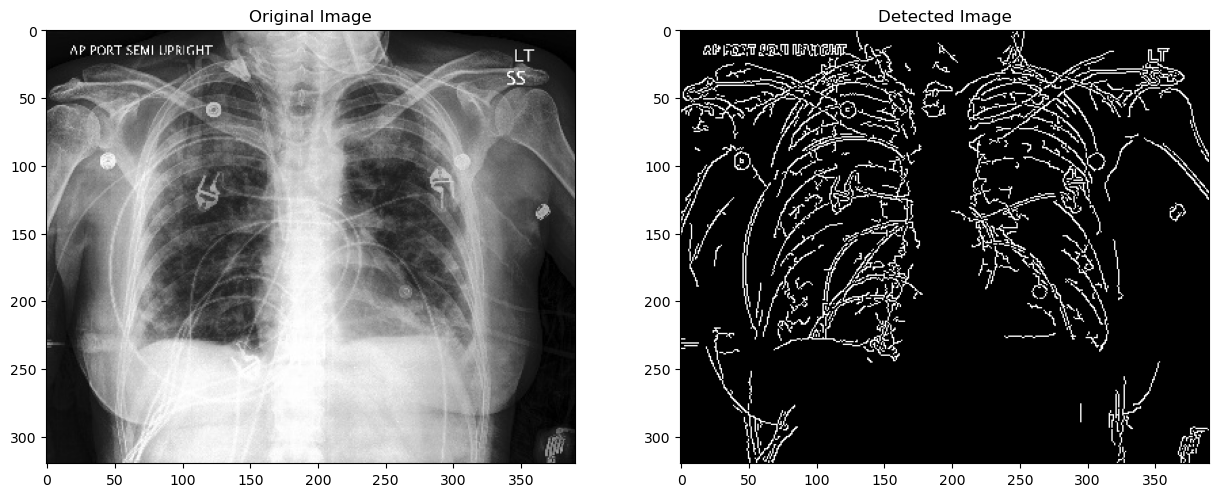

In [26]:
def detect_edge(img):
    return cv2.Canny(img,100,200)   
    #100,200은 thresold 범위잡아준거,, 잡음까지 잡아서
    #효율성 문제(뼈안까지볼필요없으므로)-언제쓰면 좋은가

detected_img=detect_edge(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(detected_img, cmap='gray')
plt.title('Detected Image')
plt.show()

#Blurring

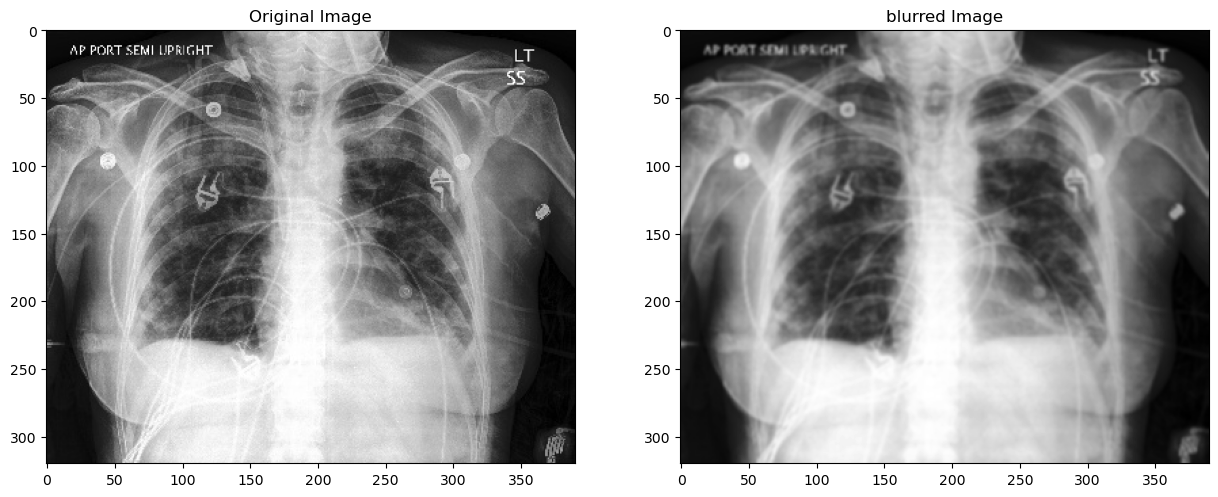

In [24]:
def blur_img(img):
    return cv2.GaussianBlur(img, (5,5),0)
#Gaussian분포는 정규분포다. 이미지블러처리 -균등한분포로 정규처리한다.
blurred_img=blur_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title('blurred Image')
plt.show()

#Contour Detection

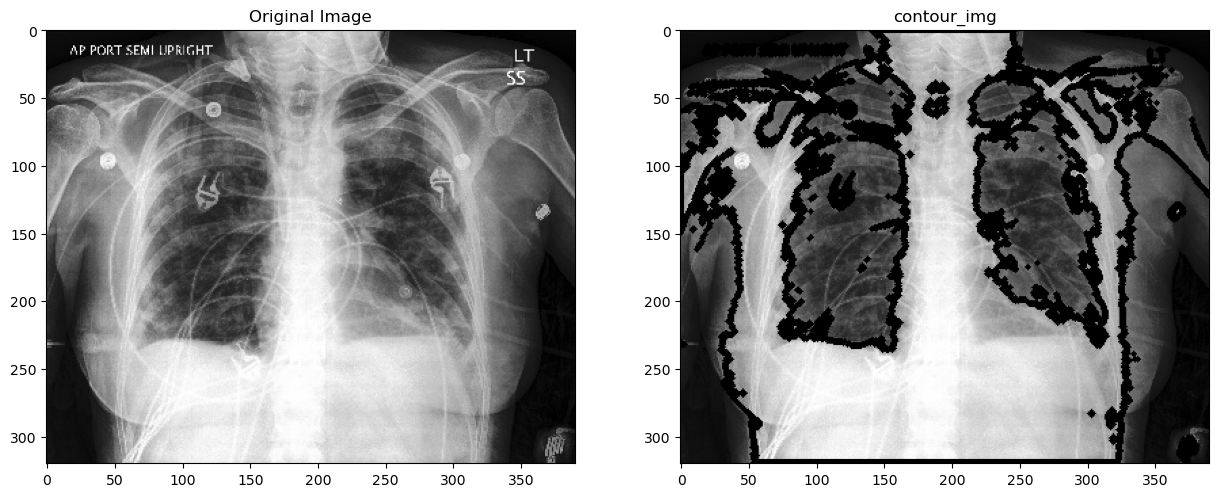

In [30]:
def find_contour(img):
    ret,thresh= cv2.threshold(img, 127,255,0)
    contours,hierachy=cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours
contours=find_contour(img)
#img에서 잡힌 pixel contour만 가져오므로 원본으로부터 overray=masking 필요
contour_img = cv2.drawContours(img.copy(),contours,-1,(0,255,0),3)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(contour_img, cmap='gray')
plt.title('contour_img')
plt.show()

Data Preparing

In [37]:
def load_data(data_dir):
    images=[]
    # labels=[]
    for img_path in os.listdir(data_dir):
        img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img= resize_image(img)
        img= clahe_image(img)
        img= normalized_img(img)
        images.append(img)
    #지금저장된거,이미지아니고숫자리스트임
    #train,test,val 분류하면끝
    prepared_datas = np.array(images)
    return prepared_datas
        

In [31]:
%whos   #선언한 식별자들 다 볼수있음.  %reset 식별자 리셋

Variable         Type        Data/Info
--------------------------------------
blur_img         function    <function blur_img at 0x000002A5E9535B20>
blurred_img      ndarray     320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
categories       list        n=3
cl_img           ndarray     320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
clahe            CLAHE       < cv2.CLAHE 000002A5E954E9D0>
contour_img      ndarray     320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
contours         tuple       n=615
cv2              module      <module 'cv2' from 'c:\\U<...>kages\\cv2\\__init__.py'>
data_dir         str         ./Positive/
denoise_img      function    <function denoise_img at 0x000002A5E95F87C0>
denoised_img     ndarray     320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
detect_edge      function    <function detect_edge at 0x000002A5E969D9E0>
detected_img     ndarray     320x390: 124800 elems, type `uint8`, 124800 bytes (12

In [32]:
%pwd  #작업폴더

'c:\\WORKSPACE\\medical1\\0604'

In [33]:
%ls   

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: E00B-DE8D

 c:\WORKSPACE\medical1\0604 ���͸�

2024-06-04  ���� 04:31    <DIR>          .
2024-06-04  ���� 04:31    <DIR>          ..
2024-06-04  ���� 05:19           156,225 m0604.ipynb
2024-06-04  ���� 02:29            90,281 m0604_01.ipynb
2024-06-05  ���� 11:32         4,265,092 m0604_02��������ó��.ipynb
2024-06-04  ���� 04:07    <DIR>          Positive
2024-06-04  ���� 02:19             1,290 torch.ipynb
2024-06-04  ���� 02:29           309,299 �������н�.ipynb
               5�� ����           4,822,187 ����Ʈ
               3�� ���͸�  104,343,691,264 ����Ʈ ����


'DOSKEY'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
